In [1]:
%config Application.log_level='ERROR'

import json, logging, os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# These are my custom libraries
import markets_lib as ml

logging.getLogger().setLevel(logging.INFO)

### Trading Strategy

* Given a timeseries and a market index (SPY)
* Buy point
    * N week low
    * N week low compared to market/sector
* Sell point
    * Total loss tolerance
    * Temporary 

2022-06-30 02:46:02,644   get_beta():    SPY: pct_0001 doesn't exist. Using pct_0001 from window_size
2022-06-30 02:46:02,649   pct_change():    WMT: pct_0001 already exists. Returning as is.
2022-06-30 02:46:03,760   map_operation(): pct_0150 does not exist for SPY. Generating against 'Price'
2022-06-30 02:46:04,866   TradeTicker.init(): Shifting column sub(WMT,SPY)(pct_0150) so that no negative values or zeroes exist


Trade report for $WMT:
Buy        Price   Sell       Price   Held     Gain%   Mkt%   
---------- ------  ---------- ------  -------- ------- -------
2000-07-31   55.25 2002-03-05   60.76  1y 217d    6.14  -12.59
2002-04-30   55.86 2012-08-16   72.15 10y 111d    2.51    2.70
2012-12-17   69.20 2013-05-20   77.40  0y 154d   11.85   16.11
2013-11-18   79.22 2015-01-14   86.61  1y  57d    8.02   10.26
2015-04-29   77.88 2017-11-21   96.52  2y 207d    8.72    8.56
2018-03-01   89.08 2018-11-14  101.53  0y 258d   13.98    0.93
2019-03-25   98.17 2019-07-31  110.38  0y 128d   12.44    6.59
2019-08-08  108.52 2020-04-07  121.99  0y 243d   12.41   -9.70
Parameters: min_profit:10% max_loss:50% window_long:150d window_short:1d
Stats: beta:0.61 std_short:1.51
Average gains:   9.51%; Market:   2.86%


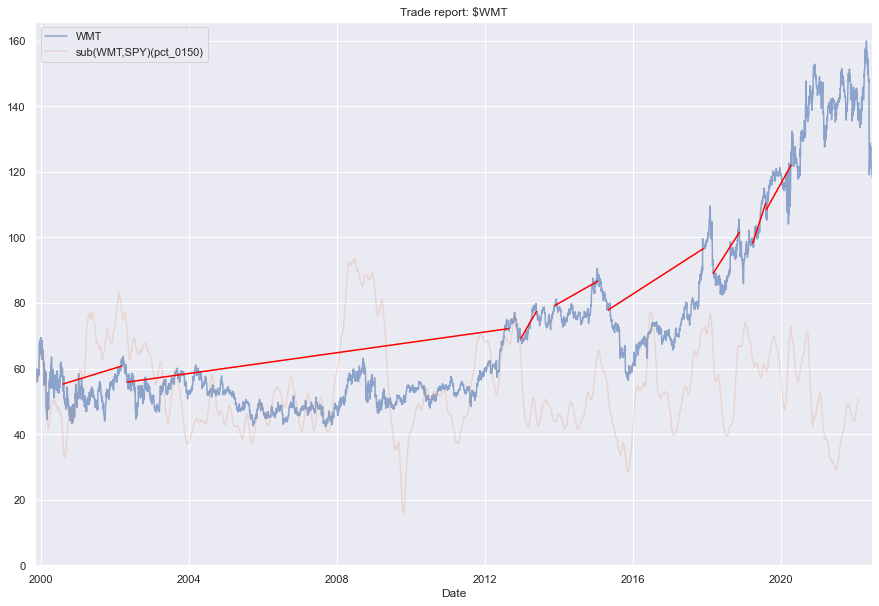

In [14]:
ticker = ml.timeseries.Ticker('WMT')
market = ml.timeseries.Ticker('SPY')

TT = ml.timeseries.TradeTicker(ticker, market, against_market=True, \
                               min_profit=10, max_loss= 50, \
                               window_short=1, window_long=150, tax_rates=(0,0))
TT.trade()
TT.report_plot()
TT.report()

### Market Trade and Plot 

In [34]:
tt = pd.read_csv('/Users/anupam/Desktop/Server/market_data/TradeTicker/trade_ticker.csv')
tt['Diff'] = tt['Pct']-tt['Mkt_Pct']
tt=tt[~(tt['Max_Loss'].isna())].reset_index(drop=True)
tt.sort_values(by='Diff', ascending=False)[:100]

,Unnamed: 0,Ticker,Against_Market,Min_Profit,Max_Loss,Window_Short,Window_Long,Beta,Held,Pct,Mkt_Pct,Diff
20070,21931,SQ,False,10.0,25.0,15.0,730.0,2.227,423.000,285.479,58.918,226.561
20062,21923,SQ,False,1.0,25.0,15.0,730.0,2.227,423.000,285.479,58.918,226.561
20074,21935,SQ,False,10.0,50.0,15.0,730.0,2.227,423.000,285.479,58.918,226.561
20066,21927,SQ,False,1.0,50.0,15.0,730.0,2.227,423.000,285.479,58.918,226.561
24272,26467,Z,False,1.0,25.0,15.0,730.0,1.461,419.500,240.588,27.574,213.014
...,...,...,...,...,...,...,...,...,...,...,...,...
15476,16832,NFLX,False,1.0,25.0,1.0,365.0,0.960,135.857,84.120,3.200,80.920
1447,1613,AMZN,False,10.0,50.0,1.0,730.0,1.203,245.500,87.603,7.037,80.566
1443,1609,AMZN,False,10.0,25.0,1.0,730.0,1.203,245.500,87.603,7.037,80.566
8252,9145,ET,True,10.0,25.0,1.0,730.0,1.032,213.000,96.140,16.383,79.757


<AxesSubplot:xlabel='Beta', ylabel='Diff'>

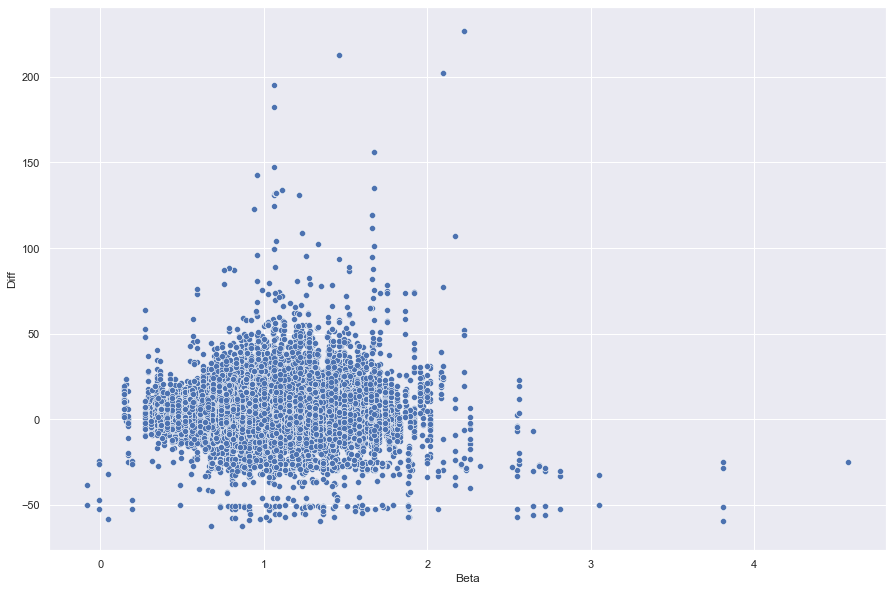

In [54]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x='Beta', y='Diff',data=tt)

In [53]:
tt['Diff'].median()

5.58

14.505287625418058 14.039473684210526 13.418970104633784 13.085241960183767 13.035074702886247 12.442888888888888 12.2464096185738 12.07325462962963 12.000037037037039 11.953229850746268 11.468113496932515 11.358262479871177 11.308925190839695 11.025505279034691 10.505723916532906 10.391989505247375 9.42020428336079 8.300089093701997 8.030760330578511 7.9573536184210525 7.9255043731778425 7.721332835820896 7.4954247933884295 7.458378834355829 6.968032069970845 6.718448584202682 6.030902694610779 5.589870149253731 5.410273570324575 5.008975109809663 4.98948998459168 4.715210218978102 

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

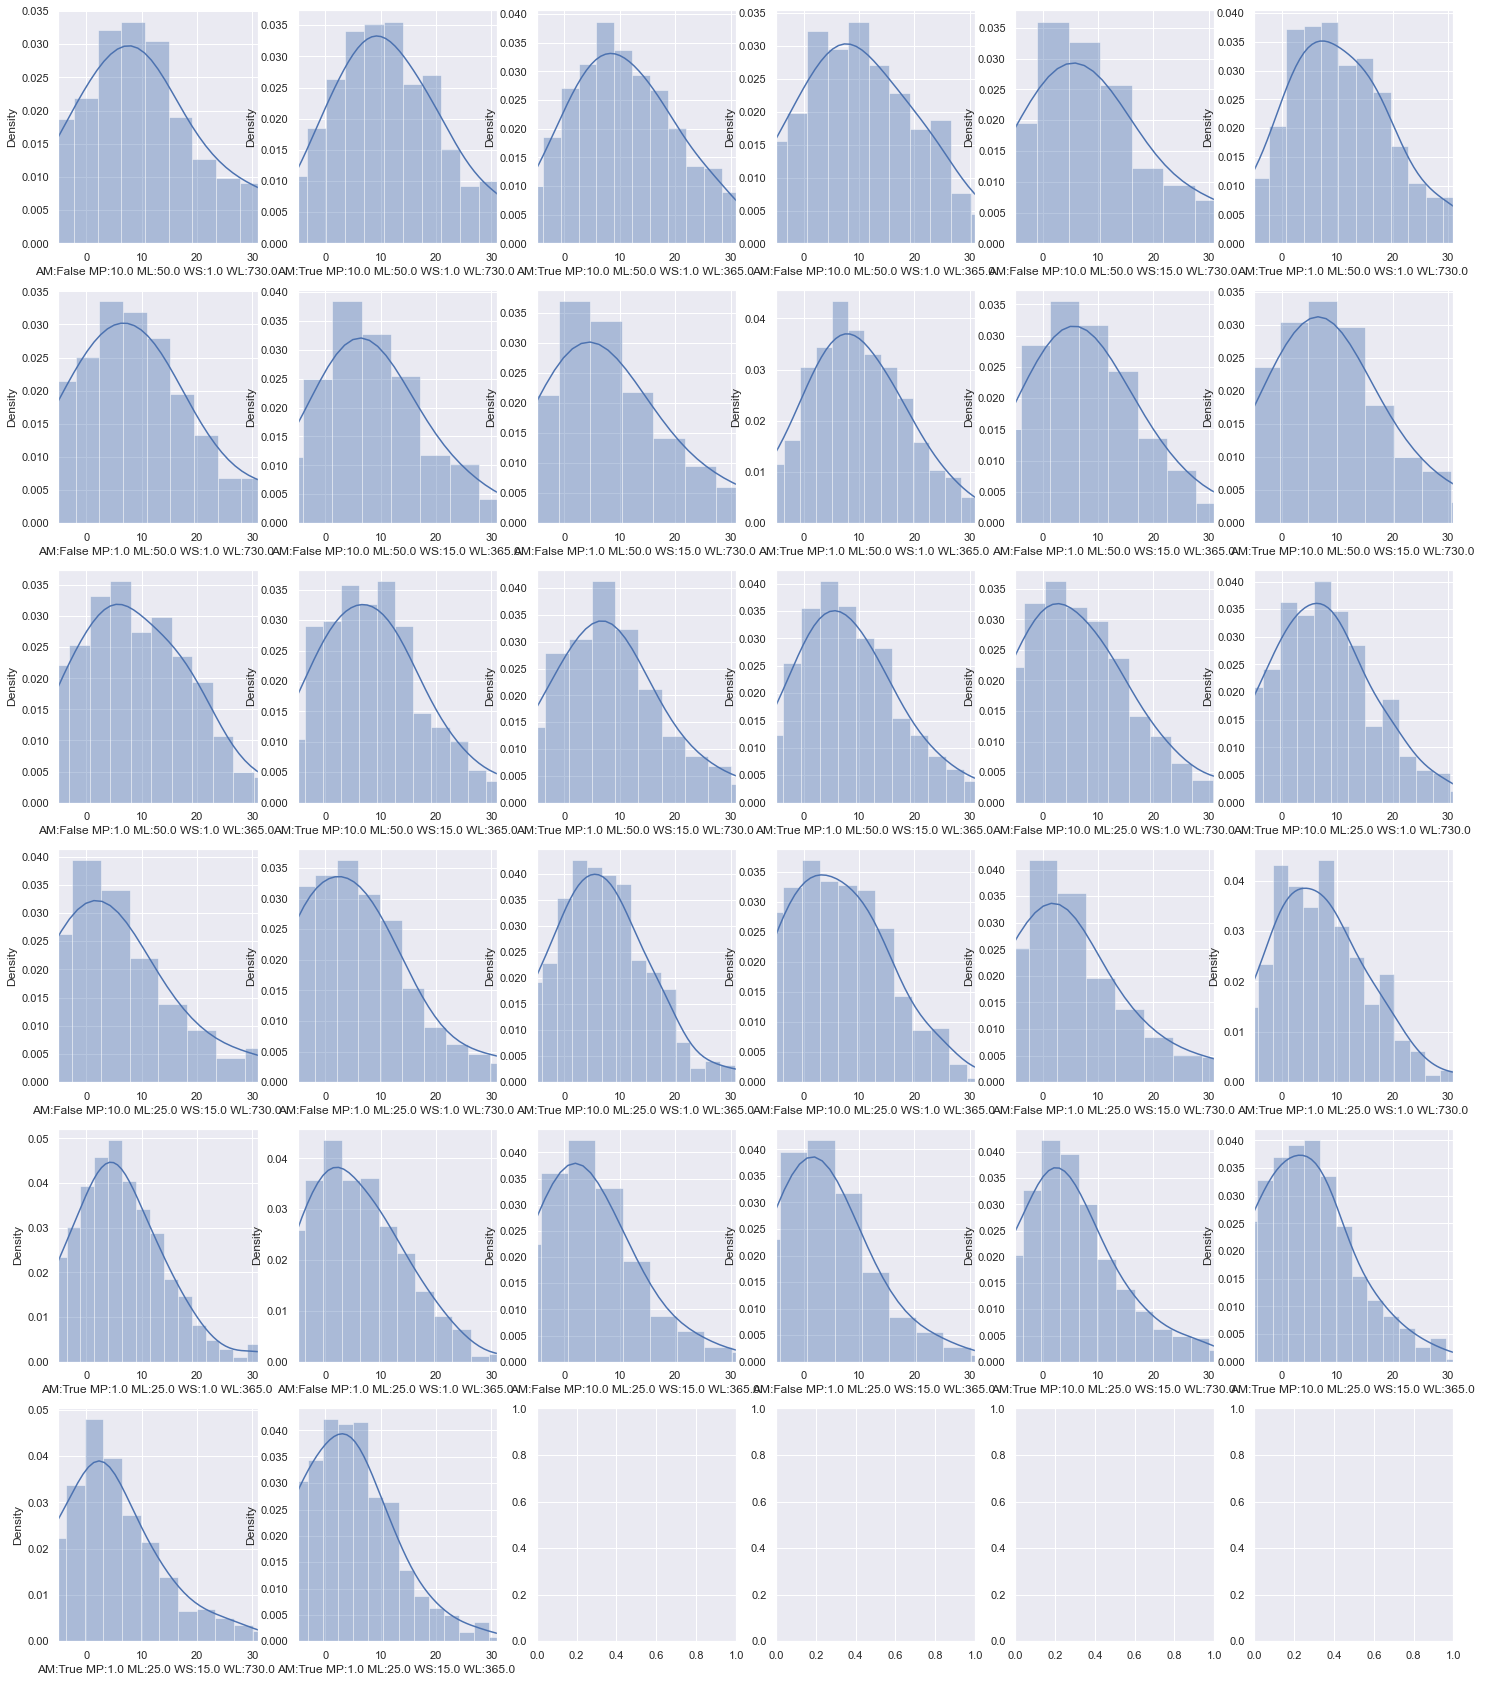

In [50]:
from itertools import product
import math

def distplot_pairs(df, columns, col_width=6):
    column_vals = [sorted(tt[c].unique()) for c in columns]
    val_combos = list(product(*column_vals))

    cols = col_width
    rows = int(math.ceil(len(val_combos) / cols))
    xlimits = (max(df['Diff']), min(df['Diff']))
    #xlimits = (30.0, -5.0)
    fig, ax = plt.subplots(rows, cols, figsize=(25,30))

    bool_vecs = []
    for vc in val_combos:
        bool_vec = pd.Series([True]*len(df))
        for i, v in enumerate(vc):
            bool_vec &= df[columns[i]]==v
        bool_vecs.append(bool_vec)

    # sorted_by_mean = sorted([(df[bv]['Diff'].median(), bv, val_combos[i]) for i, bv in enumerate(bool_vecs)], key=lambda x:x[0], reverse=True)
    sorted_by_mean = sorted([(df[bv]['Diff'][df[bv]['Diff'].between(df[bv]['Diff'].quantile(.15), df[bv]['Diff'].quantile(.99))].mean(), \
                              bv, val_combos[i]) for i, bv in enumerate(bool_vecs)], key=lambda x:x[0], reverse=True)
    for q,w,e in sorted_by_mean:
        print(q, end=' ')
    for i, (m, bv, vc) in enumerate(sorted_by_mean):
        c = int(i / cols)
        r = i % col_width

        label_slots = [None] * len(columns)
        label_slots = [(''.join([x for x in columns[j] if x.isupper()]), vc[j]) for j,s in enumerate(label_slots)]
        label_string = ''.join(['{}:{} ' for w,e in label_slots])
        label_vars = [y for x in label_slots for y in x]
        label = label_string.format(*label_vars)
        sns.distplot(df[bv]['Diff'], ax=ax[c, r], hist=True, axlabel=label)
        ax[c,r].set_xlim(-5,31)

distplot_pairs(tt, ['Against_Market', 'Min_Profit', 'Max_Loss', 'Window_Short', 'Window_Long'])

In [43]:
sorted_by_mean

NameError: name 'sorted_by_mean' is not defined

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

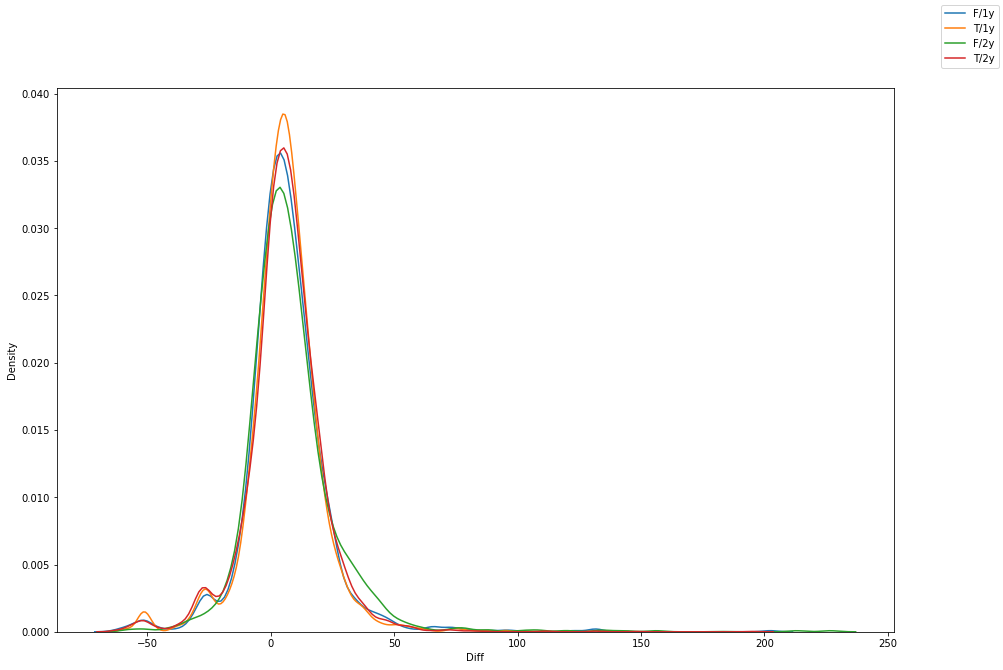

In [32]:
# dist plots for raw and diff changes
fig, ax = plt.subplots(figsize=(15,10))
sns.distplot(tt[(tt['Against_Market']== False) & (tt['Window_Long']<500)]['Diff'], ax=ax, hist=False, axlabel="QQQQ")
sns.distplot(tt[(tt['Against_Market']== True) & (tt['Window_Long']<500)]['Diff'], ax=ax, hist=False)
sns.distplot(tt[(tt['Against_Market']== False) & (tt['Window_Long']>500)]['Diff'], ax=ax, hist=False)
sns.distplot(tt[(tt['Against_Market']== True) & (tt['Window_Long']>500)]['Diff'], ax=ax, hist=False)

fig.legend(labels=['F/1y', 'T/1y', 'F/2y', 'T/2y'])

In [ ]:
sorted_by_mean

In [8]:
'180,365,730'.split(',')

['180', '365', '730']